# word2vecの結果を可視化

word2vecの結果を主成分分析を使って可視化する。
ある単語を入力した際に、その単語と類似度の高い単語のベクトルを取り出し、主成分分析により2次元に写像する。
その結果を散布図で描画する。

### 参考資料
- word2vecによる自然言語処理技術
- [word2vec可視化サンプルコード](https://github.com/nishio/mycorpus/blob/master/vis.py)

In [1]:
# いろいろパス指定
WORD2VEC_BIN_PATH = './datas/wakati.bin'
FONT_PATH = '/Library/Fonts/Osaka.ttf'

In [2]:
# jupyter notebookでグラフ描画するためのおまじない
%matplotlib inline

In [3]:
# 各種モジュールの読み込み
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import word2vec

# 日本語フォント指定する必用がある
from matplotlib.font_manager import FontProperties

font =  FontProperties(fname=FONT_PATH)
FONT_SIZE = 10
TEXT_KW = dict(fontsize=FONT_SIZE, fontweight='bold', fontproperties=font)

In [4]:
# word2vecデータの準備
data = word2vec.Word2Vec.load_word2vec_format(WORD2VEC_BIN_PATH, binary=True)

In [5]:
def vis_word2vec(target_word, data):
    # 対象の単語のベクトルと類似した単語を取得
    try:
        data[target_word]
    except:
        print u'not found.'
        return 0
    vec_japan = data[target_word]
    sim_japan = data.most_similar(positive=target_word)

    # 類似した単語のベクトル成分を取得
    vec = dict()
    for w, s in sim_japan:
        vec[w] = data[w]

    # ラベルを作成
    word_indexes = [target_word] + [w for w, s in sim_japan]

    # 主成分分析するデータを抽出
    X = data[word_indexes]

    # 主成分分析により2次元に圧縮
    pca = PCA(n_components=2)
    pca.fit(X)
    # print pca.explained_variance_ratio_

    X = pca.transform(X)
    xs = X[:, 0]
    ys = X[:, 1]

    # plotする
    plt.clf()
    plt.scatter(xs, ys, marker='o')
    plt.title(u'PCA for {}'.format(target_word), fontproperties=font)

    for i, w in enumerate(word_indexes):
        plt.annotate(
            w,
            xy = (xs[i], ys[i]),
            xytext = (3, 3),
            textcoords = 'offset points',
            ha = 'left',
            va = 'top',
            **TEXT_KW
        )

# Pythonの可変長引数

```python
def hoge(*args, **kargs):
    hogehoge---
```

今回、フォントのオプションとして
```python
TEXT_KW = dict(fontsize=FONT_SIZE, fontweight='bold', fontproperties=font)
```
を与えている。

これを引数に与えると、
```python
hoge(**TEXT_KW)
-> hoge(fontsize=FONT_SIZE, fontweight='bold', fontproperties=font)
```
と等しくなる。

/Users/takahashi/.pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


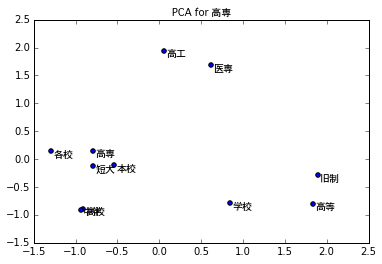

In [6]:
vis_word2vec(target_word=u'高専', data=data)

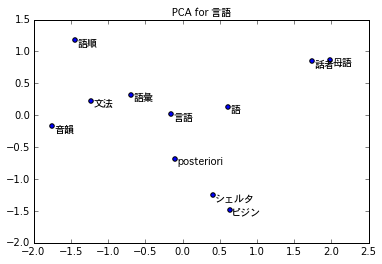

In [7]:
vis_word2vec(target_word=u'言語', data=data)

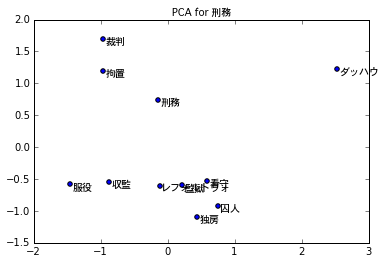

In [8]:
vis_word2vec(target_word=u'刑務', data=data)